In [3]:
import cv2
import matplotlib.pyplot as plt


In [34]:
img = cv2.imread(r'Resource/img.jpeg')

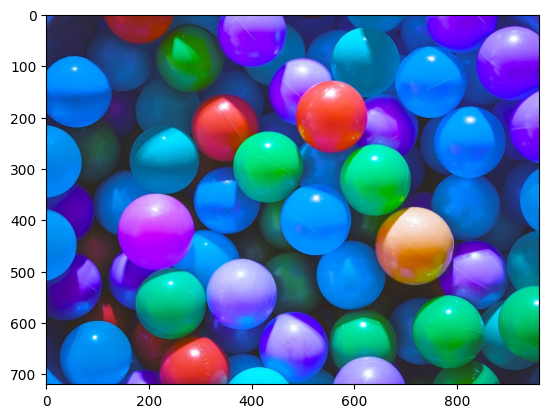

In [35]:
plt.imshow(img)

In [36]:
img.shape

(720, 960, 3)

In [37]:
img = img[:,:,::-1]
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

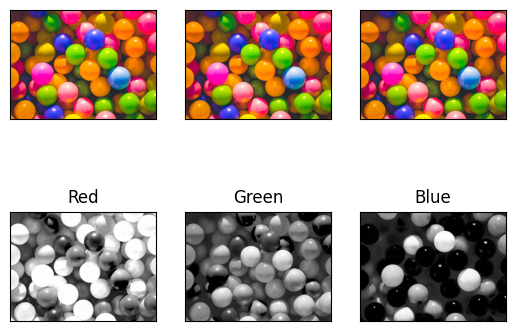

In [38]:
plt.figure(1)
plt.subplot(231)
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R,cmap='grey')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G,cmap='grey')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B,cmap='grey')
plt.xticks([])
plt.yticks([])
plt.title('Blue')

plt.show()

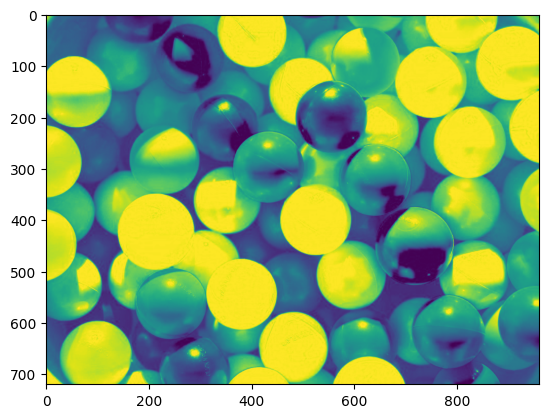

In [39]:
plt.imshow(R)


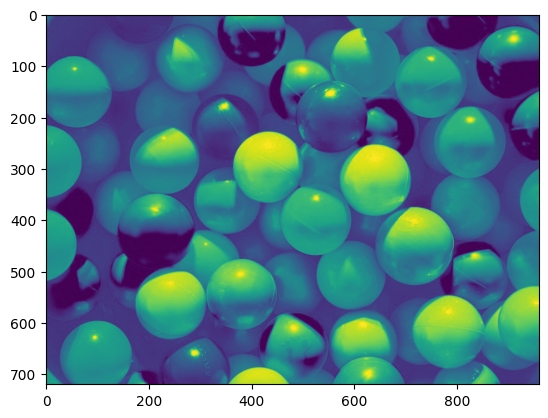

In [40]:
plt.imshow(G)


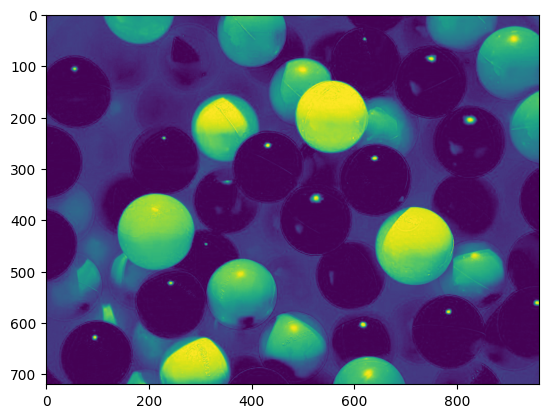

In [41]:
plt.imshow(B)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rgb = np.zeros((100,150,3), dtype='uint8')

In [3]:
rgb[:,:50,0] = 255
rgb[:,50:100,1] = 255
rgb[:,100:150,2] = 255

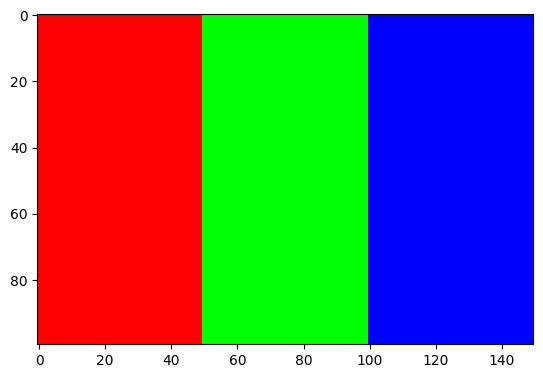

In [4]:
plt.imshow(rgb)

In [5]:
cv2.imshow('RGB',rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/arunkumar/virtual-env/my-jupytrt-env/lib/python3.12/site-packages/cv2/qt/plugins"


# RGB to HSV converting

In [12]:
def f_rgb_to_hsv(r,g,b,scalefactor):
    r, g, b = r/255.0, g/255.0, b/255.0
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    diff = cmax - cmin
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60*((g-b)/diff)+0)%360
    elif cmax == g:
        h = (60*((b-r)/diff)+120)%360
    elif cmax == b:
        h = (60*((r-g)/diff)+240)%360
        
    if h<0:
        h += 360

    if cmax ==0:
        s = 0
    else:
        s = (cmax-cmin)/cmax * scalefactor

    v = scalefactor * cmax

    return h, s, v
    
        

In [13]:
print(f_rgb_to_hsv(100,200,50,100))

(100.0, 75.0, 78.43137254901961)


In [10]:
im = cv2.imread(r'Resource/img.jpeg')

In [17]:
HsvIm = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

In [19]:
type(HsvIm)

numpy.ndarray

In [22]:
HsvIm.shape

(720, 960, 3)

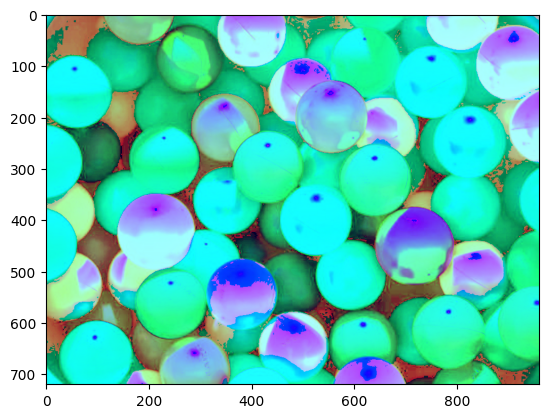

In [24]:
plt.imshow(HsvIm)

In [29]:
RGB = cv2.cvtColor(HsvIm,cv2.COLOR_HSV2RGB)

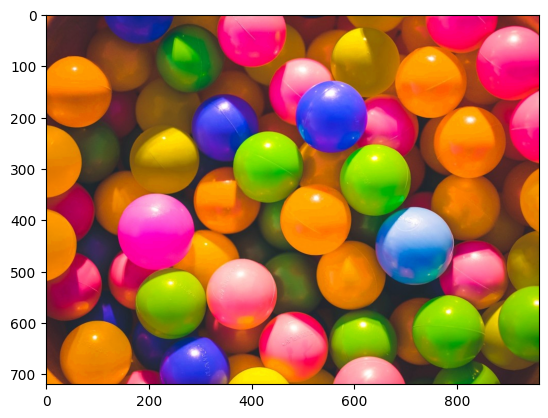

In [30]:
plt.imshow(RGB)

In [31]:
BGR = cv2.cvtColor(HsvIm,cv2.COLOR_HSV2BGR)

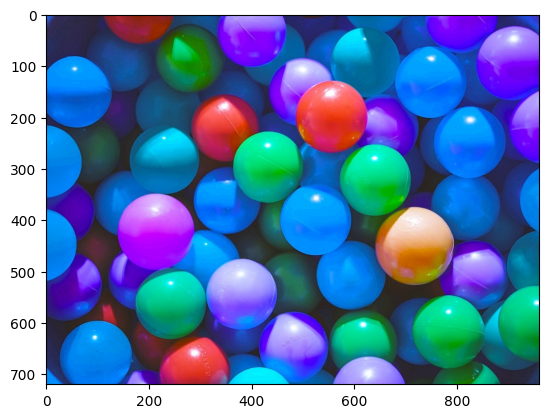

In [32]:
plt.imshow(BGR)

# Extracting Sepcific Color

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

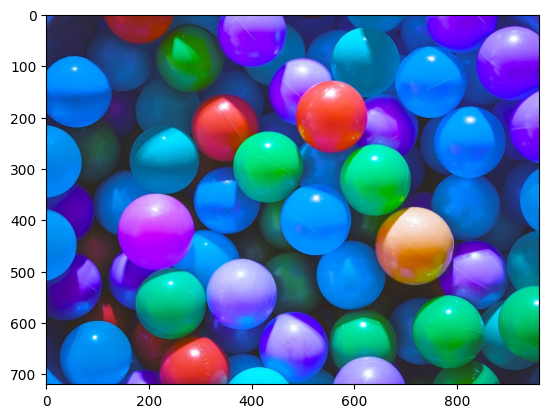

In [3]:
image = cv2.imread(r'Resource/img.jpeg')
plt.imshow(image)

In [6]:
image.shape

(720, 960, 3)

In [7]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

In [8]:
lr = np.array([0,120,70])
ur = np.array([15,255,255])y

In [10]:
mask1 = cv2.inRange(hsv,lr,ur)

In [11]:
type(mask1)

numpy.ndarray

In [12]:
mask1.dtype

dtype('uint8')

In [13]:
mask1.shape

(720, 960)

In [14]:
mask1.min(), mask1.max()

(np.uint8(0), np.uint8(255))

In [15]:
lr = np.array([165,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lr,ur)

In [16]:
mask = mask1 | mask2

In [21]:
res = cv2.bitwise_and(image,image,mask=mask)

In [23]:
cv2.bitwise_and?

Docstring:
bitwise_and(src1, src2[, dst[, mask]]) -> dst
.   @brief computes bitwise conjunction of the two arrays (dst = src1 & src2)
.   Calculates the per-element bit-wise conjunction of two arrays or an
.   array and a scalar.
.   
.   The function cv::bitwise_and calculates the per-element bit-wise logical conjunction for:
.   *   Two arrays when src1 and src2 have the same size:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   *   An array and a scalar when src2 is constructed from Scalar or has
.       the same number of elements as `src1.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
.   *   A scalar and an array when src1 is constructed from Scalar or has
.       the same number of elements as `src2.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1}  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   In case of floating-po

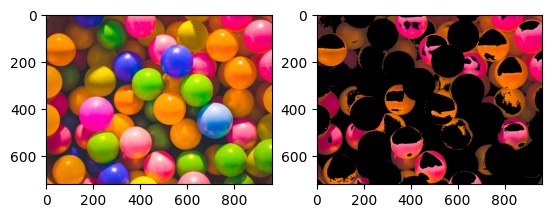

In [22]:
plt.figure(1)
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()

# Extracting Yellow color

In [24]:
image = cv2.imread('Resource/img.jpeg')

In [25]:
hsc = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

In [40]:
lr = np.array([20,100,100])
ur = np.array([30,255,255])
mask = cv2.inRange(hsv,lr,ur)



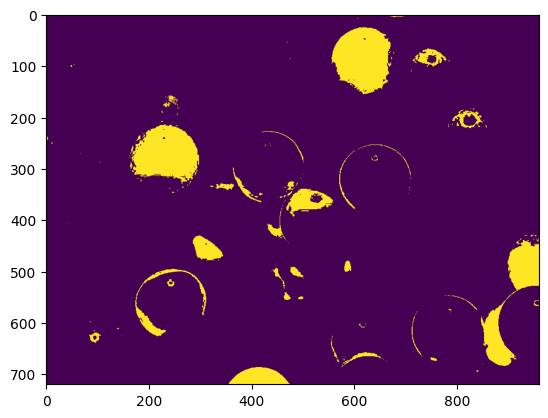

In [41]:
plt.imshow(mask)

In [42]:
result = cv2.bitwise_and(image,image,mask=mask)

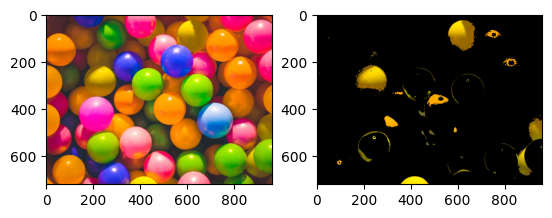

In [43]:
res = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.subplot(122)
plt.imshow(res)
plt.show()

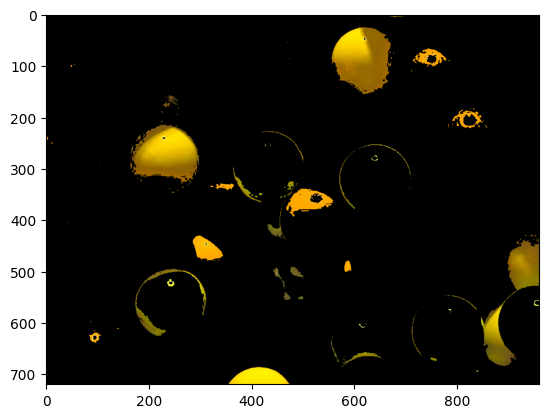

In [45]:
plt.imshow(res)